In [34]:
%matplotlib inline
from citipy import citipy
import json
import csv
import requests
from config import apikey
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import time

In [35]:
#citypy documentation for ref
#city = citipy.nearest_city(-161.27553690072585, -25.120298028273737)
#city.city_name

In [36]:
#Setting up a random counter of cordinates 
from random import uniform
x, y = uniform(-180,180), uniform(-90, 90)
x, y

(-117.83348992993902, -12.637423372642402)

In [37]:
#Loop gathering list of apx 500 cities 
list_cities = []
while len(list_cities) <= 575:
    x, y = uniform(-180,180), uniform(-90, 90)
    city = citipy.nearest_city(x, y)
    if city.city_name not in list_cities:
        list_cities.append(city.city_name)
        city = 0
else:
    city = 0
#print(list_cities)

In [38]:
#converting to data frame, and checking for duplicates
cities = pd.DataFrame({"Cities": list_cities})
#cities.Cities.duplicated()
cities.head()

,Cities
0,jamestown
1,punta arenas
2,wukari
3,ushuaia
4,harper


In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={apikey}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3bb7b80efb6c69cc146b3fb704a1e9a8&units=imperial&q='

In [40]:
temp = []
lat = []
lon = []
windspd = []
humidity = []
cloudiness = []
new_name = []

for city in cities["Cities"]:
    try:
        resp = requests.get(query_url + city).json()
        print(f"The city name is "+ resp["name"] + " & the city id is " + str(resp["id"]))
        lat.append(resp['coord']['lat'])
        new_name.append(resp["name"])
        lon.append(resp["coord"]["lon"])
        windspd.append(resp["wind"]["speed"])
        humidity.append(resp["main"]["humidity"])
        temp.append(resp["main"]["temp"])
        cloudiness.append(resp["clouds"]["all"])
        time.sleep(1.2)
    except KeyError:
        print("CITY NOT VALID")
        time.sleep(1.2)

The city name is Jamestown & the city id is 5122534
The city name is Punta Arenas & the city id is 3874787
The city name is Wukari & the city id is 2318921
The city name is Ushuaia & the city id is 3833367
The city name is Harper & the city id is 2276492
The city name is Bredasdorp & the city id is 1015776
CITY NOT VALID
The city name is Hamilton & the city id is 4513583
The city name is East London & the city id is 1006984
The city name is Qaanaaq & the city id is 3831208
The city name is Pontes e Lacerda & the city id is 3453060
The city name is Mossamedes & the city id is 3347019
The city name is Dikson & the city id is 1507390
The city name is Umm Lajj & the city id is 100926
The city name is Hermanus & the city id is 3366880
The city name is Hong Kong & the city id is 1819729
The city name is Antofagasta & the city id is 3899539
The city name is Port Elizabeth & the city id is 964420
The city name is Quatre Cocos & the city id is 1106643
The city name is Camenca & the city id is 6

The city name is Novoasbest & the city id is 1497163
The city name is Nicolas Bravo & the city id is 3522742
The city name is Wojewodztwo Lubelskie & the city id is 858785
The city name is Santiago de Cao & the city id is 3692073
The city name is Mahebourg & the city id is 934322
The city name is Abu Dhabi & the city id is 292968
The city name is Magnitka & the city id is 532292
The city name is Pisco & the city id is 3932145
The city name is Kasempa & the city id is 912628
The city name is Turukhansk & the city id is 1488903
The city name is Cap-aux-Meules & the city id is 5915327
The city name is Hershey & the city id is 5193342
The city name is Salinas & the city id is 5391295
The city name is Nara & the city id is 1855612
The city name is Copiapo & the city id is 3893656
The city name is Aktash & the city id is 1511997
The city name is Kiryat Gat & the city id is 293842
The city name is Arroyo de la Encomienda & the city id is 3129371
The city name is Knysna & the city id is 988698

The city name is Cascais & the city id is 2269594
The city name is Arlit & the city id is 2447513
The city name is Maxixe & the city id is 1039536
The city name is Tumbes & the city id is 3691148
The city name is Kurchum & the city id is 1521762
The city name is Amudat & the city id is 235191
The city name is Buritis & the city id is 3468732
The city name is Cauquenes & the city id is 3896105
The city name is Barcarena & the city id is 3406429
The city name is Camacha & the city id is 2270385
The city name is Belousovka & the city id is 1525490
The city name is Dragoman & the city id is 731961
The city name is Gurupa & the city id is 3398480
The city name is Sao Gabriel da Cachoeira & the city id is 3662342
The city name is Saint George's & the city id is 3579925
The city name is Assiut & the city id is 359783
The city name is Jueterbog & the city id is 2894394
The city name is Viedma & the city id is 3832899
CITY NOT VALID
The city name is Baghdad & the city id is 98182
The city name 

The city name is Bathsheba & the city id is 3374083
The city name is Nowy Dwor Mazowiecki & the city id is 763556
The city name is Vilhena & the city id is 3924679
The city name is Korzhevskiy & the city id is 544332
CITY NOT VALID
The city name is Limenaria & the city id is 735418
The city name is Genc & the city id is 314648
The city name is Vadamadurai & the city id is 1253595
CITY NOT VALID
The city name is Odda & the city id is 3143830
The city name is Rafaela & the city id is 3839479
The city name is Bonavista & the city id is 5905393
The city name is Kedrovyy & the city id is 1538641
The city name is Arrondissement d'Ajaccio & the city id is 3038333
The city name is Sorland & the city id is 3137469
The city name is Tigzirt & the city id is 2476660
The city name is Vila Franca do Campo & the city id is 3372472
The city name is Cuamba & the city id is 1047660
CITY NOT VALID
The city name is Laguna & the city id is 5364271
The city name is Mahuva & the city id is 1267454
The city n

In [41]:
new_dic = ({"City Name": new_name, "Tempurature": temp, "Latitude": lat, "Longitude": lon, "Wind Spd": windspd, "Humidity %": humidity, "Cloud %": cloudiness})
new_df = pd.DataFrame(new_dic)
new_df.head()

,City Name,Tempurature,Latitude,Longitude,Wind Spd,Humidity %,Cloud %
0,Jamestown,43.97,42.10,-79.24,10.29,93,90
1,Punta Arenas,50.92,-53.15,-70.92,16.11,87,90
2,Wukari,80.49,7.85,9.78,3.22,22,2
3,Ushuaia,53.60,-54.80,-68.30,4.36,54,90
4,Harper,77.94,4.38,-7.72,3.78,91,29


Text(0.5, 1.0, 'Tempurature (F) vs. Latitude')

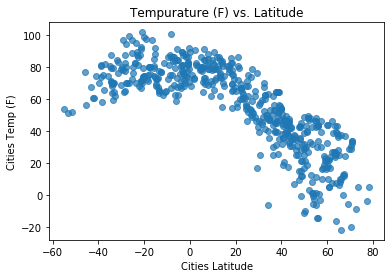

In [48]:
plt.scatter(new_df["Latitude"], new_df["Tempurature"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Temp (F)")
plt.title("Tempurature (F) vs. Latitude")

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

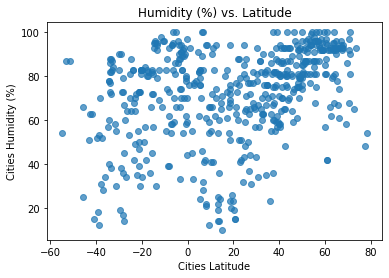

In [43]:
plt.scatter(new_df["Latitude"], new_df["Humidity %"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

Text(0.5, 1.0, 'Couldiness (%) vs. Latitude')

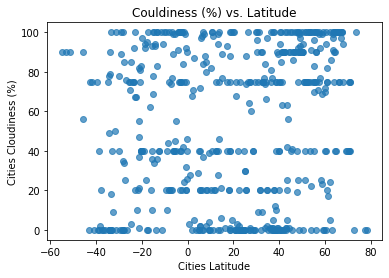

In [46]:
plt.scatter(new_df["Latitude"], new_df["Cloud %"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Cloudiness (%)")
plt.title("Couldiness (%) vs. Latitude")

Text(0.5, 1.0, 'Wind Spd (mph) vs. Latitude')

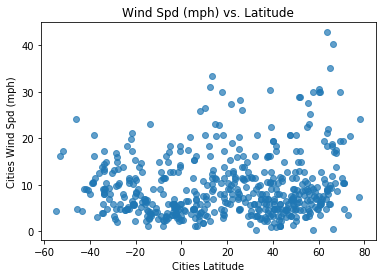

In [47]:
plt.scatter(new_df["Latitude"], new_df["Wind Spd"], alpha=.7)
plt.xlabel("Cities Latitude")
plt.ylabel("Cities Wind Spd (mph)")
plt.title("Wind Spd (mph) vs. Latitude")